In [1]:
import sys
sys.path.append('..')
from run.run_gspa import calculate_wavelet_dictionary
from run.run_ae_default_config import run_ae
import leidenalg
import scanpy, phate, meld
import numpy as np
import scprep
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
import sklearn
from sklearn.preprocessing import scale
import magic

/home/aarthivenkat/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
markers = ["Mki67", 'Birc5', 'Pclaf', 'Top2a', 'Hist1h1b', 'Stmn1',
           "Tcf7", "Lef1", "Ccr7", "Sell",
           "Slamf6", 'Xcl1',
           "Il7r", "Malat1", "Cxcr3", "Ltb", "Gpr183",
           "Irf7", "Stat1", 'Isg20', 'Ifit1', 'Ifit3', 'Isg15',
           "Nkg7", "Ccl5", "Ly6c2", "Lgals1", "Prf1", "Klrg1", "Cx3cr1", "Klre1", "Zeb2", "Gzma",
           "Pdcd1", "Cd101", "Havcr2"]

In [2]:
acute = scanpy.read_h5ad('data/acute_tcells.h5ad')
chronic = scanpy.read_h5ad('data/chronic_tcells.h5ad')

In [10]:
acute

AnnData object with n_obs × n_vars = 20969 × 14152
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt-', 'log1p_total_counts_mt-', 'pct_counts_mt-', 'n_counts'
    obsm: 'X_phate'

In [11]:
chronic

AnnData object with n_obs × n_vars = 18735 × 14152
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt-', 'log1p_total_counts_mt-', 'pct_counts_mt-', 'n_counts'
    obsm: 'X_phate'

In [12]:
adata = scanpy.concat((acute,chronic))
adata.obs['batch'] = adata.obs['batch'].astype('category')

In [13]:
adata

AnnData object with n_obs × n_vars = 39704 × 14152
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt-', 'log1p_total_counts_mt-', 'pct_counts_mt-', 'n_counts'
    obsm: 'X_phate'

In [5]:
phate_op = phate.PHATE(random_state=42, n_jobs=-1, knn=30)
adata.obsm['X_phate'] = phate_op.fit_transform(adata.to_df())

Calculating PHATE...
  Running PHATE on 39704 observations and 14152 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 20.44 seconds.
    Calculating KNN search...
    Calculated KNN search in 49.83 seconds.
    Calculating affinities...
    Calculated affinities in 6.20 seconds.
  Calculated graph and diffusion operator in 77.03 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 18.35 seconds.
    Calculating KMeans...
    Calculated KMeans in 10.56 seconds.
  Calculated landmark operator in 30.79 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 1.69 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.71 seconds.
Calculated PHATE in 115.68 seconds.


In [8]:
magic_op = magic.MAGIC()
data_magic = magic_op.fit_transform(adata.to_df(), genes=['Tcf7', 'Mki67', 'Gzma', 'Pdcd1'], graph=phate_op.graph)

Calculating MAGIC...
  Running MAGIC on 39704 cells and 14152 genes.
  Using precomputed graph and diffusion operator...
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.87 seconds.


/home/aarthivenkat/.local/lib/python3.8/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


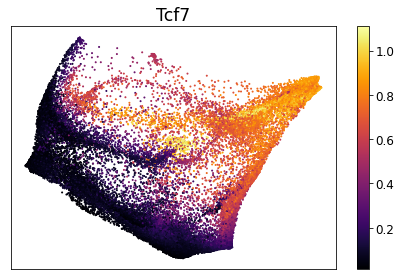

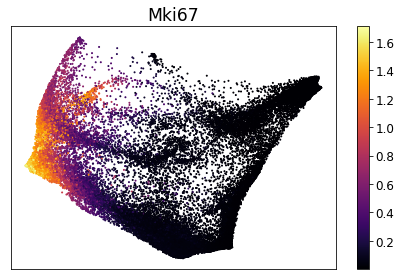

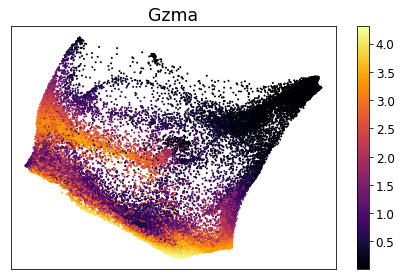

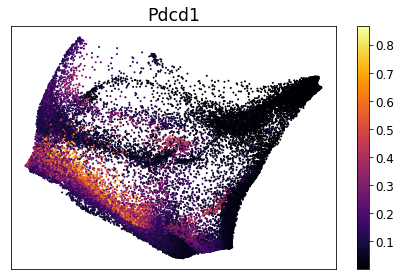

In [9]:
for gene in ['Tcf7', 'Mki67', 'Gzma', 'Pdcd1']:
    scprep.plot.scatter2d(adata.obsm['X_phate'], c=data_magic[gene], ticks=None, legend_loc=(1.05,0), 
                      filename=f'figures/{gene}.png', dpi=200, title=gene, figsize=())

In [6]:
cmap = dict([(sample,plt.cm.Paired.colors[:6][i]) for i,sample in enumerate(['AcuteD4', 'ChronicD4', 'AcuteD8', 'ChronicD8', 'Acute40', 'Chronic40'])])

<AxesSubplot:title={'center':'Cd3e+ cells'}>

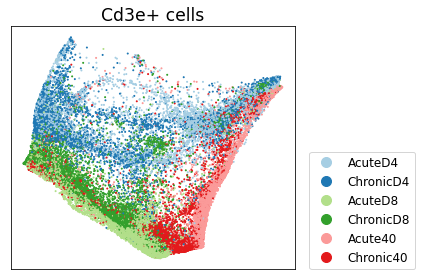

In [7]:
scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['batch'], ticks=None, legend_loc=(1.05,0), 
                      filename='figures/samples_tcells.png', dpi=200, title='Cd3e+ cells', cmap=cmap, )